In [1]:
import numpy as np
import pandas as pd

# Load the Iris dataset
iris = pd.read_csv("IRIS.csv")
iris

<ipython-input-1-a8bfb65e1886>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
# Create a DataFrame
df_iris = iris
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Explore the data
print("Dataset Head:")
print(df_iris.head()) 

print("\n")
print("Description of the data:")
print(df_iris.describe())  

print("\n")
print("infomation of the data")
print(df_iris.info())  

Dataset Head:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Description of the data:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


inf

In [10]:
print(iris['species'].unique())  # Check species values

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


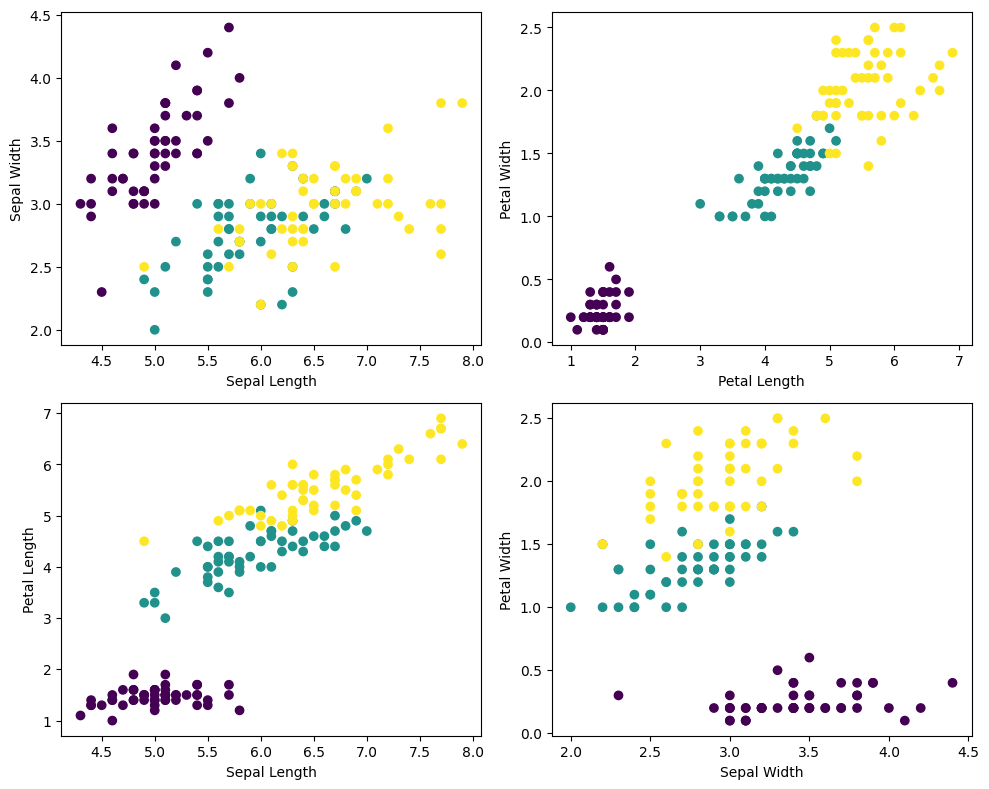

In [11]:
# Plotting Sepal and Petal measurements against each other for visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot for Sepal Length vs Sepal Width
axes[0, 0].scatter(iris['sepal_length'], iris['sepal_width'], c=iris['species'].astype('category').cat.codes)
axes[0, 0].set_xlabel('Sepal Length')
axes[0, 0].set_ylabel('Sepal Width')

# Scatter plot for Petal Length vs Petal Width
axes[0, 1].scatter(iris['petal_length'], iris['petal_width'], c=iris['species'].astype('category').cat.codes)
axes[0, 1].set_xlabel('Petal Length')
axes[0, 1].set_ylabel('Petal Width')

# Scatter plot for Sepal Length vs Petal Length
axes[1, 0].scatter(iris['sepal_length'], iris['petal_length'], c=iris['species'].astype('category').cat.codes)
axes[1, 0].set_xlabel('Sepal Length')
axes[1, 0].set_ylabel('Petal Length')

# Scatter plot for Sepal Width vs Petal Width
axes[1, 1].scatter(iris['sepal_width'], iris['petal_width'], c=iris['species'].astype('category').cat.codes)
axes[1, 1].set_xlabel('Sepal Width')
axes[1, 1].set_ylabel('Petal Width')

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separate features (X) and labels (y)
X = iris.iloc[:, :-1]  # All columns except 'species'
y = iris['species']     # Target column

# Split into training and testing datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



<ipython-input-14-f5e5cb97dad5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + iris['species'].unique().tolist())
<ipython-input-14-f5e5cb97dad5>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + iris['species'].unique().tolist())


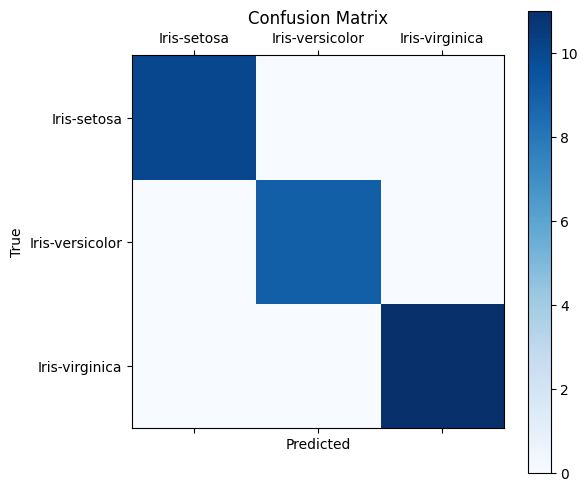

In [14]:
# Check accuracy and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize Confusion Matrix using Matplotlib
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(cm, cmap='Blues')
fig.colorbar(cax)

# Add labels
ax.set_xticklabels([''] + iris['species'].unique().tolist())
ax.set_yticklabels([''] + iris['species'].unique().tolist())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [15]:
# Predict species for a new flower with measurements
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example input
predicted_species = model.predict(new_data)
print(f"\nPredicted species: {predicted_species[0]}")


/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Predicted species: Iris-setosa
